# Public vs. Housing Banishment

This notebook will focus on separating and creating two distinct map layouts for:
- public banishment - places where the affected people can be
- housing banishment - places where the affected people cannot livewith 500ft vs. 250ft buffer

In [1]:
# import necessary pacakges
import geopandas as gpd
import mapclassify
import pandas as pd
import pickle
import os
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.legend import Legend
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.ops import unary_union
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set path
directory_path = os.getcwd()
parent = os.path.dirname(directory_path)

In [3]:
# import pickled gdf
chicago_boundaries = pd.read_pickle(os.path.join(parent,'data/pickle/chicago_boundaries'))
bike_routes = pd.read_pickle(os.path.join(parent,'data/pickle/bike_routes'))
daycare_buffer = pd.read_pickle(os.path.join(parent,'data/pickle/daycare_buffer'))
forestry = pd.read_pickle(os.path.join(parent,'data/pickle/forestry'))
parks_buffer = pd.read_pickle(os.path.join(parent,'data/pickle/parks_buffer'))
schools_buffer = pd.read_pickle(os.path.join(parent,'data/pickle/schools_buffer'))
opens_spaces = pd.read_pickle(os.path.join(parent,'data/pickle/open_spaces'))
loc_aff_index = pd.read_pickle(os.path.join(parent,'data/pickle/location_aff_index'))

## Housing Banishment

In [4]:
housing_banishment = [daycare_buffer, parks_buffer, schools_buffer]

### 500 ft buffer

In [5]:
# set geometry to 500ft buffer
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_500', inplace=True)

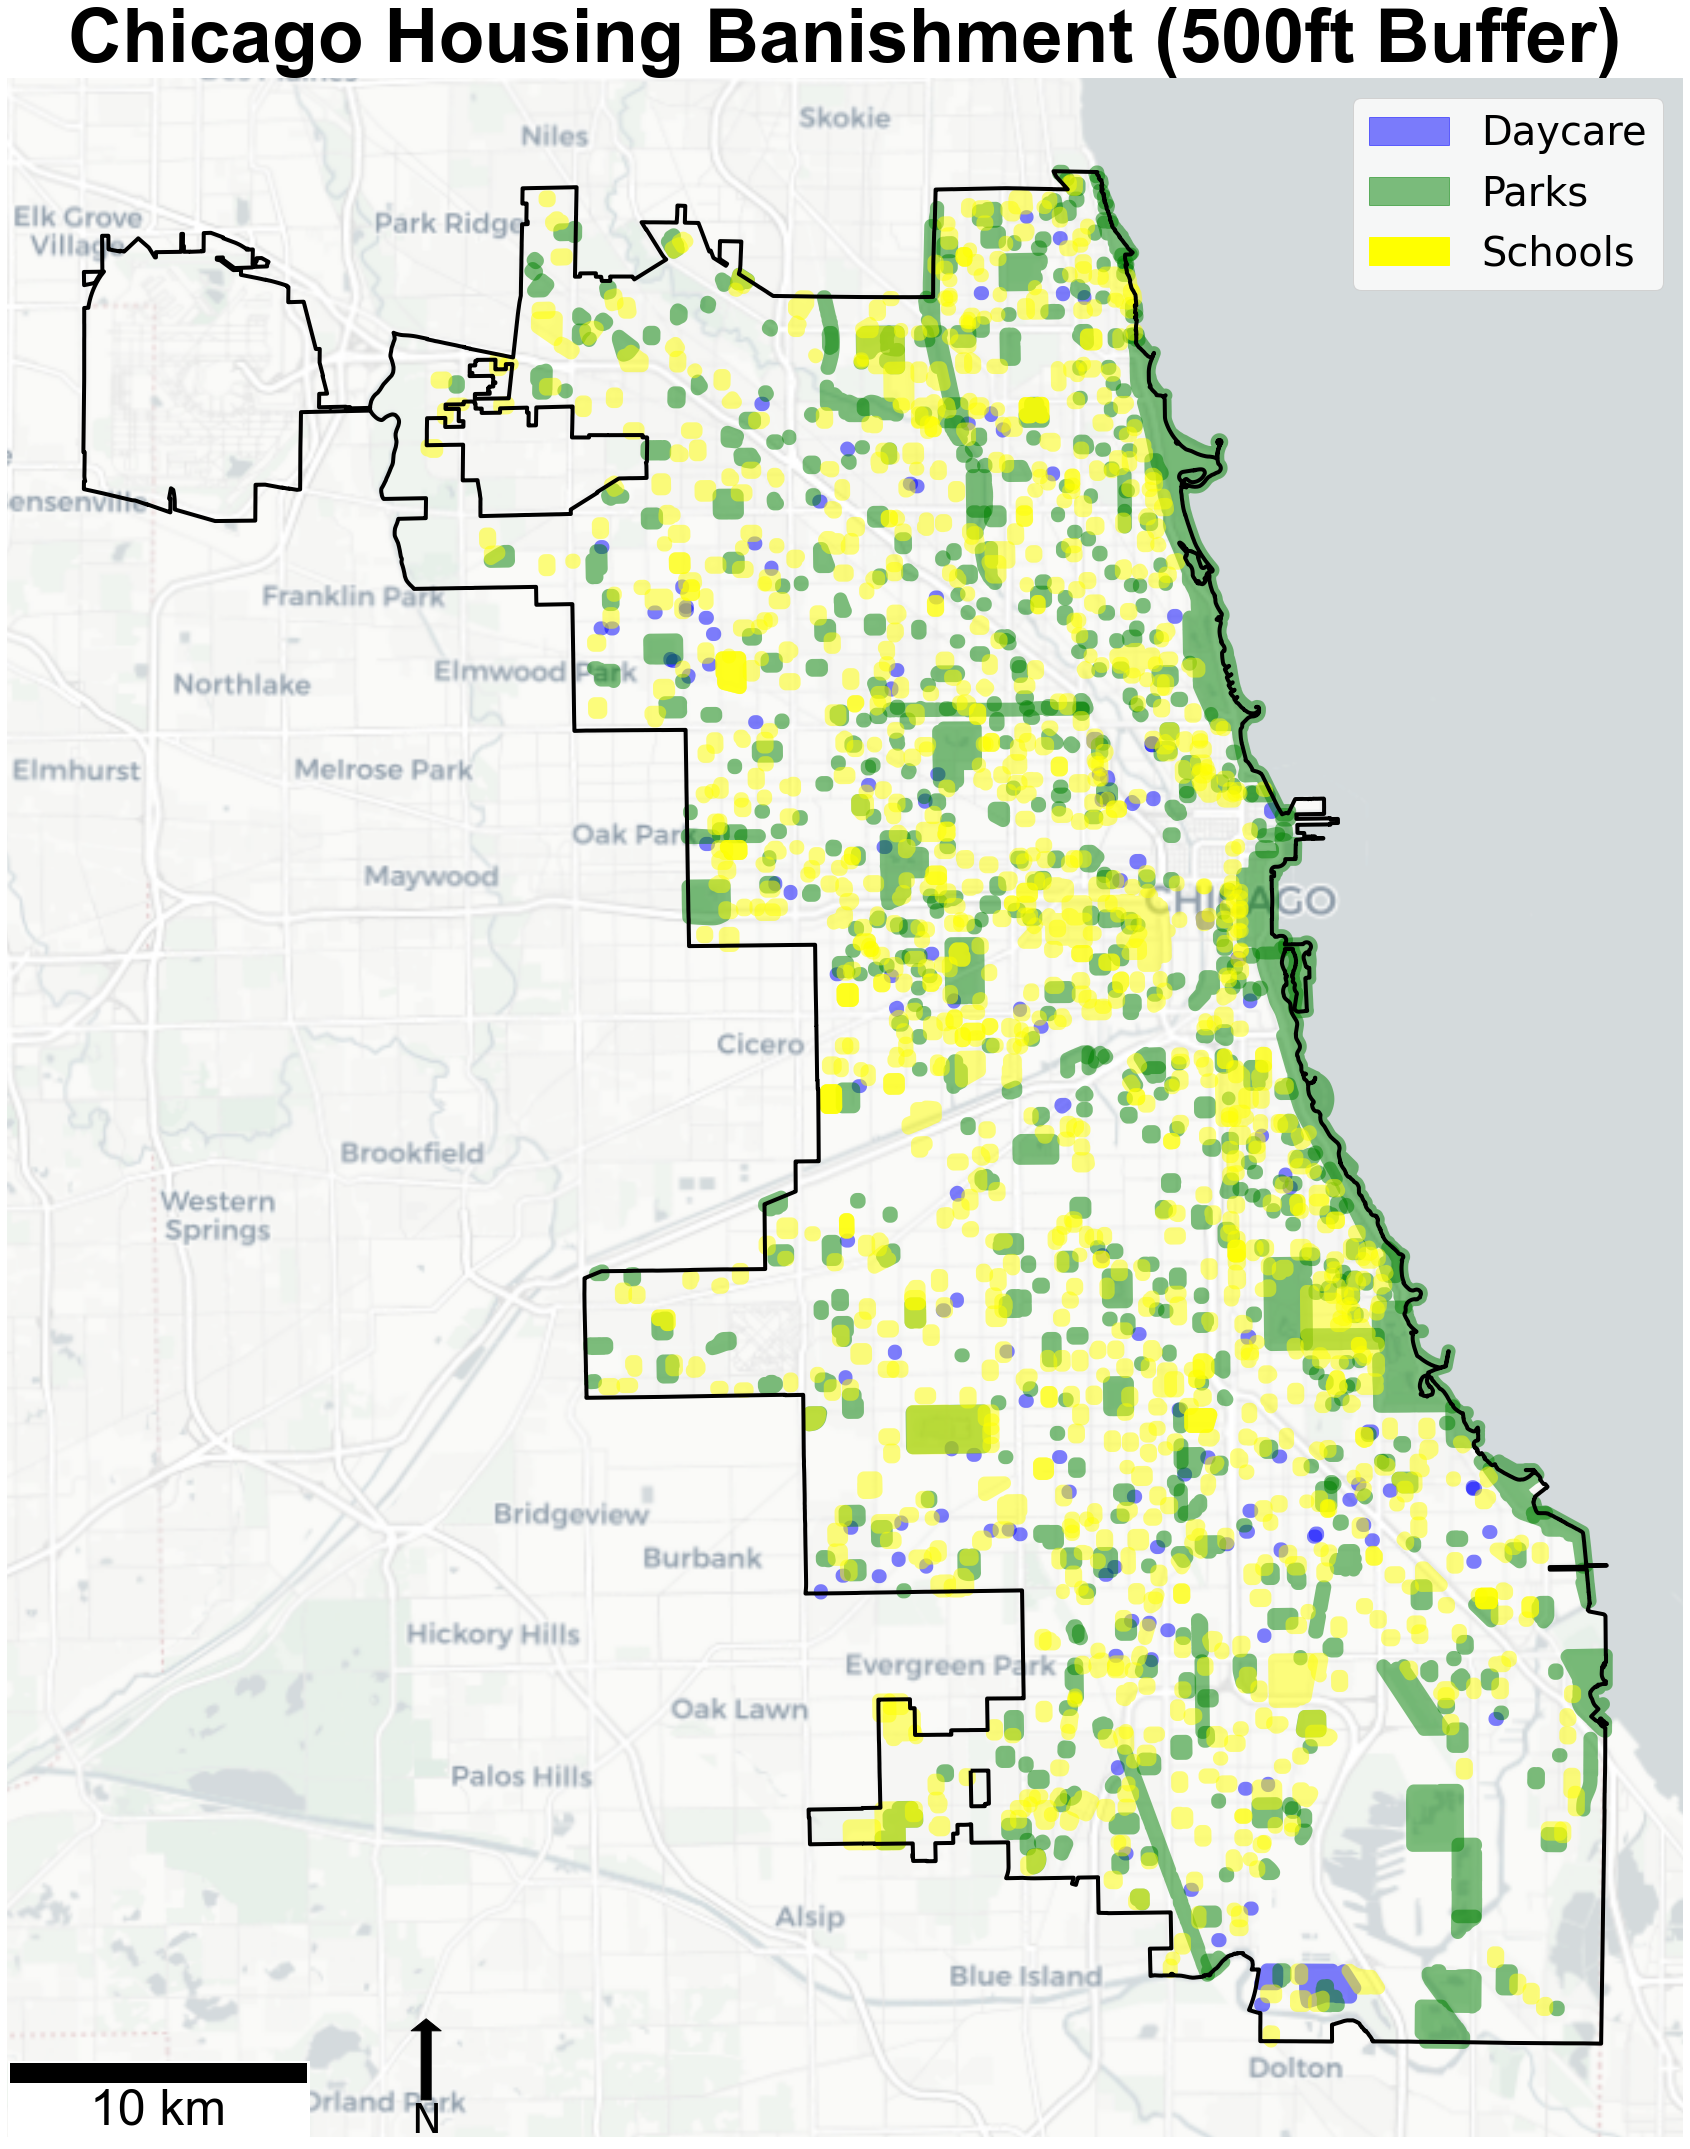

In [6]:
# 500 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

parks_buffer.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

schools_buffer.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':40}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Housing Banishment (500ft Buffer)', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})
# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig(os.path.join(parent,'images/chi_housing_banishment_500ft.png'), transparent=True)
plt.show()

### 250 ft buffer

In [7]:
# set geometry to 250ft buffer
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_250', inplace=True)

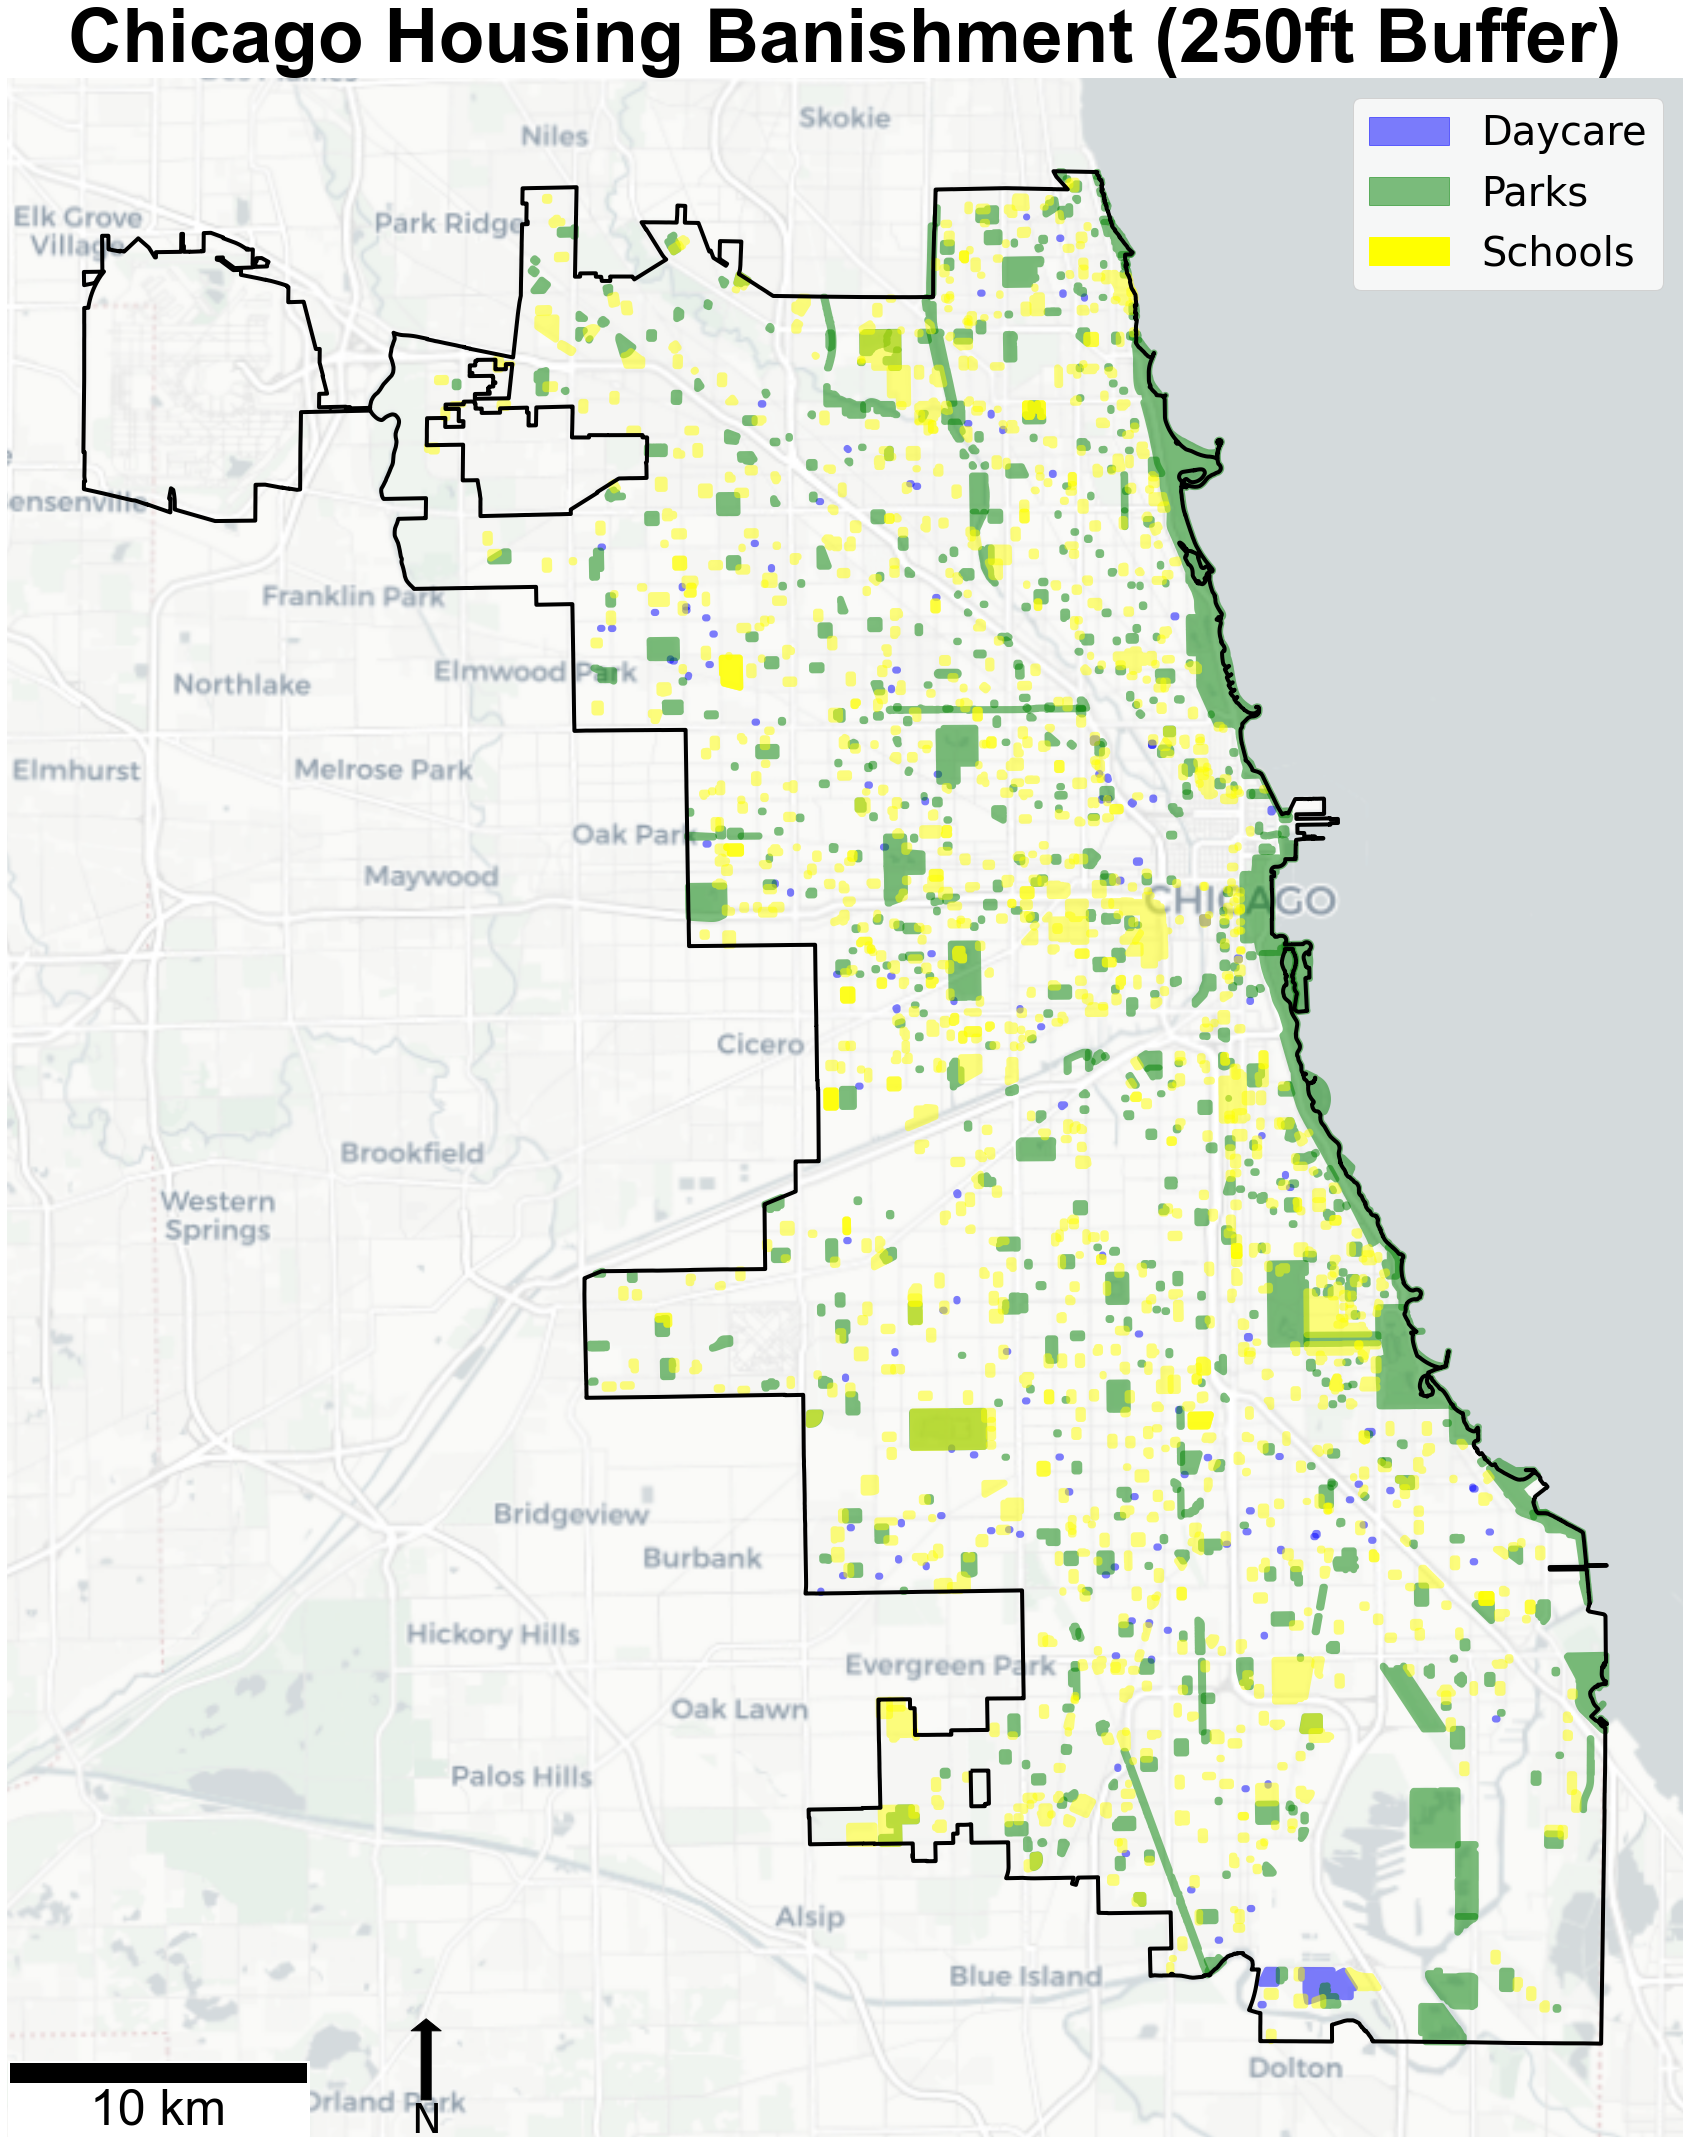

In [8]:
# 250 ft buffer map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap, alpha=0.5)
daycare_leg = mpatches.Patch(color='blue', label='Daycare', alpha=0.5)

parks_buffer.plot(color='green',ax=basemap, alpha=0.5)
parks_leg = mpatches.Patch(color='green',label='Parks', alpha=0.5)

schools_buffer.plot(color='yellow',ax=basemap, alpha=0.5)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':40}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Housing Banishment (250ft Buffer)', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig(os.path.join(parent,'images/chi_housing_banishment_250ft.png'), transparent=True)
plt.show()

## Public Presence Banishment

- Any school
- Any public park building
- Any playground or recreation area
- Any public park
- Within 500ft of a public way or park whilst someone under the age of 18 is present
- Any daycare center
- Any county fair (when persons under the age of 18 are present)

To satisfy the above mandate, we will work with:
- Schools
- Daycre
- Parks
- Bike Paths (public way)
- Forest Preserves (public way)
- Open spaces - Boulevards zip? 


In [9]:
# make list of public banishment places
public_banishment = [schools_buffer, daycare_buffer, parks_buffer,bike_routes, 
                     forestry,opens_spaces]

In [10]:
# set geometry to standard non-buffered  geom
for gdf in public_banishment:
    gdf.set_geometry(col='geometry', inplace=True)

In [ ]:
# public presence banishment map
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot each geometry
daycare_buffer.plot(color='blue', ax=basemap)
daycare_leg = mpatches.Patch(color='blue', label='Daycare')

parks_buffer.plot(color='green',ax=basemap)
parks_leg = mpatches.Patch(color='green',label='Parks')

schools_buffer.plot(color='yellow',ax=basemap)
schools_leg = mpatches.Patch(color='yellow', label='Schools')

bike_routes.plot(color='red', ax=basemap)
bike_routes_leg = mpatches.Patch(color='red', label='Bike Routes')

forestry.plot(color='darkgreen', ax=basemap)
forestry_leg = mpatches.Patch(color='darkgreen', label='Forest Preserves')

opens_spaces.plot(color='orange', ax=basemap)
opens_spaces_leg = mpatches.Patch(color='orange', label='Boulevards')

# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':35}, handles=[
                                          daycare_leg, 
                                          parks_leg, 
                                          schools_leg,
                                          bike_routes_leg,
                                          forestry_leg, opens_spaces_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Public Banishment', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig(os.path.join(parent,'images/chi_public_banishment.png'), transparent=True)
plt.show()

## Dissolve housing geometries
- next each geometry needs to be dissolved and then a union performed to create one geometry for each banishment type.
### 250ft buffer

In [ ]:
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_250', inplace=True)

In [ ]:
# create unary union for each gdf
schools_buffer_diss_250 = schools_buffer['buffer_250'].unary_union
parks_buffer_diss_250 = parks_buffer['buffer_250'].unary_union
daycare_buffer_diss_250 = daycare_buffer['buffer_250'].unary_union

In [ ]:
# merge school and parks
schools_parks_buffer_250 = schools_buffer_diss_250.union(parks_buffer_diss_250)

In [ ]:
# merge all geometries
housing_ban_buffer_250 = schools_parks_buffer_250.union(daycare_buffer_diss_250)

In [ ]:
# put multipolygon into gdf so can plot
housing_diss_buffer_250 = gpd.GeoDataFrame(crs=schools_buffer.crs, 
                                           geometry=[housing_ban_buffer_250])

In [ ]:
# preview df
housing_diss_buffer_250

In [ ]:
housing_diss_buffer_250.info()

In [ ]:
housing_diss_buffer_250.crs

In [ ]:
# pickle diss gdf for interactive notebook
housing_diss_buffer_250.to_pickle(os.path.join(parent,'data/pickle/housing_diss_buffer_250'))

### 500ft buffer

In [ ]:
# set 500ft buffer as geometry
for gdf in housing_banishment:
    gdf.set_geometry(col='buffer_500', inplace=True)

In [ ]:
# create unary union for each gdf
school_buffer_diss_500 = schools_buffer['buffer_500'].unary_union
parks_buffer_diss_500 = parks_buffer['buffer_500'].unary_union
daycare_buffer_diss_500 = daycare_buffer['buffer_500'].unary_union

In [ ]:
# merge school and parks
school_parks_buffer_500 = school_buffer_diss_500.union(parks_buffer_diss_500)

In [ ]:
# merge all geometries
housing_ban_buffer_500 = school_parks_buffer_500.union(daycare_buffer_diss_500)

In [ ]:
# put multipolygon into a gdf
housing_diss_buffer_500 = gpd.GeoDataFrame(crs=schools_buffer.crs, geometry=[housing_ban_buffer_500])

In [ ]:
housing_diss_buffer_500.info()

In [ ]:
housing_diss_buffer_500.crs

In [ ]:
housing_diss_buffer_500

In [ ]:
# pickle dissolved gdf for interactive mapping notebook
housing_diss_buffer_500.to_pickle(os.path.join(parent,'data/pickle/housing_diss_buffer_500'))

In [ ]:
# 250 ft buffer map w/ cbar
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')
basemap_leg = mlines.Line2D([0],[0],color="k",
                             linewidth=4,
                             label="Chicago Boundary")

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot geometry
housing_diss_buffer_250.plot(facecolor="#DDDDDD", hatch="//",edgecolor="red", ax=basemap, zorder=2, alpha=0.8)
housing_diss_buffer_leg = mpatches.Patch(edgecolor="red",
                                         facecolor="#DDDDDD", hatch="//",
                                         label='Banishment Zones',
                                        alpha=0.8)

#plot loc_aff_index w cmap
loc_aff_index.plot(column='median_gro',ax=basemap, alpha=0.65, zorder=1,
                   edgecolor='k',
                   legend=True)

# set parameters for cbar
fig = basemap.figure
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=40)
cb_ax.set_ylabel("Median Gross Rent ($USD)", rotation=90, fontdict={'fontsize':40})


# turn off axies
basemap.axis('off')

# legend
basemap.legend(prop={'size':40}, handles=[basemap_leg,housing_diss_buffer_leg])

# turn off axies
basemap.axis('off')

# set title
basemap.set_title('Chicago Housing Banishment (250ft Buffer)', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)

plt.tight_layout()
plt.savefig(os.path.join(parent,'images/chi_housing_banishment_250ft_cbar.png'), 
            transparent=True)
plt.show()

### 250ft buffer w/ User Defined breaks

In [ ]:
# 250 ft buffer map w/ natural breaks
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')
# basemap legend
basemap_leg = mlines.Line2D([0],[0],color="k",
                             linewidth=4,
                             label="Chicago Boundary")

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot geometry
banishment_zones = housing_diss_buffer_250.plot(facecolor="#DDDDDD", hatch="//",
                                                edgecolor="red", 
                                                ax=basemap, 
                                                zorder=2,
                                               label="Banishment Zones", alpha=0.8)
housing_diss_buffer_leg = mpatches.Patch(edgecolor="red",
                                         facecolor="#DDDDDD", hatch="//",
                                         label='Banishment Zones', alpha=0.8)

#plot loc_aff_index with natural breaks
loc_aff = loc_aff_index.plot(column='median_gro',ax=basemap, alpha=0.5,
                    legend=True,
                   edgecolor='k',
                  scheme='quantiles',
                  legend_kwds={
                      "fontsize":30,
                      "fmt":"{:.0f}",
                      "title":"Median Rent ($USD)",
                      "title_fontsize":35,
                      "markerscale":3,
                  },
                  missing_kwds={
                      "color":"lightgrey",
                      "edgecolor":"k",
                      "hatch":"///",
                      "label":"Missing Values"
                  })

#format legend numbers
# get all upper bounds
upper_bounds = mapclassify.UserDefined(loc_aff_index.median_gro, bins=[500,1000,1500,2000]).bins

# get and format all bounds
bounds = []
for index, upper_bound in enumerate(upper_bounds):
    if index == 0:
        lower_bound = loc_aff_index.median_gro.min()
    else:
        lower_bound = upper_bounds[index-1]
        
    # format the numerical legend here
    bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
    bounds.append(bound)
    
# get all the legend labels
legend_labels = basemap.get_legend().get_texts()

# replace the legend labels
for bound, legend_label in zip(bounds, legend_labels):
    legend_label.set_text(bound)
    
# add legend
leg2 = Legend(parent=basemap, handles=[basemap_leg,housing_diss_buffer_leg],
      labels=["Chicago Boundaries", "Banishment Zones"],
             loc=[0.76,0.78], fontsize=30, frameon=False)

basemap.add_artist(leg2)

# turn off axies
basemap.axis('off')


# set title
basemap.set_title('Chicago Housing Banishment (250ft Buffer)', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)


plt.tight_layout()
plt.savefig(os.path.join(parent,'images/chi_housing_banishment_250ft_med_rent.png'), 
                         transparent=True, bbox_inches='tight')
plt.show()

### 500ft buffer with User Defined Breaks

In [ ]:
# 250 ft buffer map w/ natural breaks
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')
# basemap legend
basemap_leg = mlines.Line2D([0],[0],color="k",
                             linewidth=4,
                             label="Chicago Boundary")

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot geometry
banishment_zones = housing_diss_buffer_500.plot(facecolor="#DDDDDD", hatch="//",
                                                edgecolor="red", 
                                                ax=basemap, 
                                                zorder=2,
                                               label="Banishment Zones", alpha=0.8)
housing_diss_buffer_leg = mpatches.Patch(edgecolor="red",
                                         facecolor="#DDDDDD", hatch="//",
                                         label='Banishment Zones', alpha=0.8)

#plot loc_aff_index with natural breaks
loc_aff = loc_aff_index.plot(column='median_gro',ax=basemap, alpha=0.5,
                    legend=True,
                   edgecolor='k',
                  scheme='quantiles',
                  legend_kwds={
                      "fontsize":30,
                      "fmt":"{:.0f}",
                      "title":"Median Rent ($USD)",
                      "title_fontsize":35,
                      "markerscale":3,
                  },
                  missing_kwds={
                      "color":"lightgrey",
                      "edgecolor":"k",
                      "hatch":"///",
                      "label":"Missing Values"
                  })

#format legend numbers
# get all upper bounds
upper_bounds = mapclassify.UserDefined(loc_aff_index.median_gro, bins=[500,1000,1500,2000]).bins

# get and format all bounds
bounds = []
for index, upper_bound in enumerate(upper_bounds):
    if index == 0:
        lower_bound = loc_aff_index.median_gro.min()
    else:
        lower_bound = upper_bounds[index-1]
        
    # format the numerical legend here
    bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
    bounds.append(bound)
    
# get all the legend labels
legend_labels = basemap.get_legend().get_texts()

# replace the legend labels
for bound, legend_label in zip(bounds, legend_labels):
    legend_label.set_text(bound)
    
# add legend
leg2 = Legend(parent=basemap, handles=[basemap_leg,housing_diss_buffer_leg],
      labels=["Chicago Boundaries", "Banishment Zones"],
             loc=[0.76,0.78], fontsize=30, frameon=False)

basemap.add_artist(leg2)

# turn off axies
basemap.axis('off')


# set title
basemap.set_title('Chicago Housing Banishment (500ft Buffer)', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)


plt.tight_layout()
plt.savefig(os.path.join(parent,'./images/chi_housing_banishment_500ft_med_rent.png'), 
            transparent=True, bbox_inches='tight')
plt.show()

### Plot Public Banishment Zones w/ Median Rent
#### Dissolve geometries

In [ ]:
# set geometry to standard for public banishmnet geom
for gdf in public_banishment:
    gdf.set_geometry(col='geometry', inplace=True)

In [ ]:
# unary union each gdf
# set geometry to standard non-buffered  geom
schools_diss = schools_buffer['geometry'].unary_union
daycare_diss = daycare_buffer['geometry'].unary_union
parks_diss = parks_buffer['geometry'].unary_union
bike_routes_diss = bike_routes['geometry'].unary_union
forestry_diss = forestry['geometry'].unary_union
open_spaces_diss = opens_spaces['geometry'].unary_union

In [ ]:
# union each gdf into one multipolygon
school_parks_diss = schools_diss.union(parks_diss)
schools_parks_daycare = school_parks_diss.union(daycare_diss)
schools_parks_daycare_bike = schools_parks_daycare.union(bike_routes_diss)
schools_parks_daycare_bike_for = schools_parks_daycare_bike.union(forestry_diss)
all_public_diss = schools_parks_daycare_bike_for.union(open_spaces_diss)

In [ ]:
# make multipolgon into a gdf
public_banishment = gpd.GeoDataFrame(crs=schools_buffer.crs,geometry=[all_public_diss])

In [ ]:
public_banishment.info()

In [ ]:
public_banishment.crs

In [ ]:
public_banishment

In [ ]:
# pickle diss gdf for use in interactive notebook
public_banishment.to_pickle(os.path.join(parent,'data/pickle/pub_banish_diss'))

### Plot Public Banishment w/ Med Rent

In [ ]:
# 250 ft buffer map w/ natural breaks
# set basemap with Chicago Boundaries
basemap = chicago_boundaries.boundary.plot(color='k',
                                           figsize=(30,30),
                                          linewidth=4,
                                           label='Chicago Boundaries')
# basemap legend
basemap_leg = mlines.Line2D([0],[0],color="k",
                             linewidth=4,
                             label="Chicago Boundary")

# add contextily basemap
ctx.add_basemap(basemap,crs=32616,source=ctx.providers.CartoDB.Positron)

# plot geometry
banishment_zones = public_banishment.plot(facecolor="#DDDDDD", hatch="//",
                                                edgecolor="red", 
                                                ax=basemap, 
                                                zorder=2,
                                               label="Banishment Zones", alpha=0.8)
public_banishment_leg = mpatches.Patch(edgecolor="red",
                                         facecolor="#DDDDDD", hatch="//",
                                         label='Banishment Zones', alpha=0.8)

#plot loc_aff_index with natural breaks
loc_aff = loc_aff_index.plot(column='median_gro',ax=basemap, alpha=0.5,
                    legend=True,
                   edgecolor='k',
                  scheme='quantiles',
                  legend_kwds={
                      "fontsize":30,
                      "fmt":"{:.0f}",
                      "title":"Median Rent ($USD)",
                      "title_fontsize":35,
                      "markerscale":3,
                  },
                  missing_kwds={
                      "color":"lightgrey",
                      "edgecolor":"k",
                      "hatch":"///",
                      "label":"Missing Values"
                  })

#format legend numbers
# get all upper bounds
upper_bounds = mapclassify.UserDefined(loc_aff_index.median_gro, bins=[500,1000,1500,2000]).bins

# get and format all bounds
bounds = []
for index, upper_bound in enumerate(upper_bounds):
    if index == 0:
        lower_bound = loc_aff_index.median_gro.min()
    else:
        lower_bound = upper_bounds[index-1]
        
    # format the numerical legend here
    bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
    bounds.append(bound)
    
# get all the legend labels
legend_labels = basemap.get_legend().get_texts()

# replace the legend labels
for bound, legend_label in zip(bounds, legend_labels):
    legend_label.set_text(bound)
    
# add legend
leg2 = Legend(parent=basemap, handles=[basemap_leg,housing_diss_buffer_leg],
      labels=["Chicago Boundaries", "Banisment Zones"],
             loc=[0.76,0.78], fontsize=30, frameon=False)

basemap.add_artist(leg2)

# turn off axies
basemap.axis('off')


# set title
basemap.set_title('Chicago Public Banishment', fontdict={'size':75,
                                                            'weight':'bold',
                                                            'family':'arial'})

# add scale bar
basemap.add_artist(ScaleBar(dx=1.5,
                            location="lower left", 
                            font_properties={'family':'arial','size':50}, 
                            frameon=True,fixed_units='m'))

# add north arrow
x, y, arrow_length = 0.25, 0.0575, 0.05
basemap.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='k', width=10, headwidth=30),
                va='center',ha='center', fontsize=40,
                xycoords=basemap.transAxes)


plt.tight_layout()
plt.savefig(os.path.join(parent,'images/chi_public_banishment_med_rent.png'), 
            transparent=True, bbox_inches='tight')
plt.show()